In [14]:
import spacy

In [15]:
nlp = spacy.load("en")

In [16]:
with open("../data/smaller_text_sample.txt", "r") as f:
    text = f.read()

In [17]:
doc = nlp(text)

In [18]:
len(doc.ents)

5848

In [19]:
ent=doc.ents[0]

In [20]:
ent.text

'Mobile World Congress'

In [21]:
filter_entities = ["PERSON", "ORG"]
text_entities = []
for ent in doc.ents:
    if ent.label_ in filter_entities:
        text_entities.append(ent.text)

In [22]:
text_entities = set(text_entities)

In [23]:
with open("../data/openie_smaller_text_sample.txt", "r") as f:
    openie_triples = []
    for line in f:
        openie_triples.append(line.strip("\n").split("|"))

In [24]:
openie_triples

[[''],
 ['last year ', ' at ', ' CES'],
 ['FF ', ' of ', ' Batmobile-style concept race car'],
 ['He ', ' FFZERO1 at ', " year 's CES"],
 ['He ', ' FFZERO1 at ', " last year 's CES"],
 ['China ', ' has ', ' NextEV'],
 ['his potential role ', ' remains ', ' unclear'],
 ['his departure ', ' does mark ', ' latest in string of resignations'],
 ['his departure ', ' does mark ', ' latest'],
 ['his departure ',
  ' does mark ',
  ' latest in string of resignations at carmaker'],
 ['his departure ',
  ' does mark ',
  ' latest in string of high-level resignations'],
 ['his departure ', ' does mark ', ' latest in string'],
 ['his departure ',
  ' does mark ',
  ' latest in string of high-level resignations at electric carmaker'],
 ['his departure ',
  ' does mark ',
  ' latest in string of resignations at electric carmaker'],
 ['his departure ', ' does mark ', ' latest in string at carmaker'],
 ['his departure ', ' does mark ', ' latest in string at electric carmaker'],
 ['his departure ',
  ' 

In [25]:
filtered_triples = []
for triple in openie_triples:
    if len(triple)==3:
        if triple[0].strip() in text_entities and triple[2].strip() in text_entities:
            filtered_triples.append(triple)

In [26]:
filtered_triples

[['Marco Mattiacci ', ' left ', ' Joerg Sommer'],
 ['Mattiacci ', ' CEO of ', ' Ferrari North America'],
 ['Mattiacci ', ' joining ', ' FF'],
 ['Sommer ', ' was at ', ' FF'],
 ['Beacon ', ' is offshoot of ', ' Spot'],
 ['John Badalamenti ', ' lead at ', ' Uber'],
 ['Apple ', ' beat anyway ', ' Google'],
 ['Apple ', ' beat anyway ', ' Microsoft'],
 ['Apple ', ' beat ', ' Google'],
 ['Apple ', ' beat ', ' Microsoft'],
 ['Lili Cheng ', ' engineer at ', ' Microsoft'],
 ['Microsoft ', ' has ', ' Office'],
 ['Microsoft ', ' has ', ' Windows'],
 ['Microsoft ', ' has ', ' Xbox'],
 ['Peter Lee ', ' president at ', ' Microsoft Research'],
 ['Mike Schroepfer ', ' officer at ', ' Facebook'],
 ['Karma Automotive ', ' is direct descendent of ', ' Fisker Automotive'],
 ['Karma Automotive ', ' is descendent of ', ' Fisker Automotive'],
 ['Wanxiang ', ' later acquired ', ' Fisker'],
 ['Wanxiang ', ' acquired ', ' Fisker'],
 ['Karma Automotive ', ' introduce ', ' Revero'],
 ['Karma Automotive ', ' has '

In [27]:
len(filtered_triples)

134

# Get text to Cluster

In [32]:
text_list = [ x[1].strip() for x in filtered_triples]

In [33]:
text_list

['left',
 'CEO of',
 'joining',
 'was at',
 'is offshoot of',
 'lead at',
 'beat anyway',
 'beat anyway',
 'beat',
 'beat',
 'engineer at',
 'has',
 'has',
 'has',
 'president at',
 'officer at',
 'is direct descendent of',
 'is descendent of',
 'later acquired',
 'acquired',
 'introduce',
 'has',
 'is finally taking for',
 'is taking for',
 'is finally taking on',
 'is taking on',
 'spokesperson for',
 'director for',
 'run',
 'wants',
 'project',
 'has hired Robert Parker away from',
 'has hired',
 'served At',
 'starting at',
 'Now starting at',
 'has',
 'integrate',
 'director at',
 'inside',
 'has',
 "president 's",
 'switching to',
 'has partnered with',
 'has',
 'has',
 'from',
 'radically reinvented',
 'reinvented',
 'has',
 'eventually building',
 'eventually building',
 'eventually building',
 'building',
 'building',
 'worked closely',
 'extend',
 'building',
 'worked',
 'update',
 'Reached by',
 'has provided',
 'bring',
 'using',
 'promote',
 'CEO of',
 'just released',
 '

# Clustering 

Check things like
- https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [64]:
from bert_serving.client import BertClient
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

import numpy as np

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

In [35]:
bc = BertClient()
BERT_embedding = bc.encode(text_list)

In [40]:
km = KMeans(n_clusters=40)
km.fit(BERT_embedding)  # BERT_corpus)
clusters = km.labels_.tolist()

In [41]:
clusters

[37,
 1,
 32,
 34,
 28,
 26,
 5,
 5,
 30,
 30,
 20,
 2,
 2,
 2,
 20,
 20,
 7,
 7,
 3,
 16,
 10,
 2,
 13,
 13,
 13,
 13,
 1,
 20,
 14,
 24,
 10,
 15,
 31,
 31,
 12,
 12,
 2,
 10,
 20,
 8,
 2,
 19,
 6,
 31,
 2,
 2,
 0,
 21,
 21,
 2,
 6,
 6,
 6,
 8,
 8,
 36,
 10,
 8,
 24,
 35,
 34,
 31,
 14,
 11,
 10,
 1,
 33,
 33,
 15,
 10,
 2,
 32,
 32,
 20,
 17,
 14,
 32,
 16,
 0,
 16,
 29,
 20,
 31,
 22,
 24,
 18,
 19,
 0,
 15,
 1,
 1,
 0,
 2,
 27,
 16,
 14,
 2,
 19,
 23,
 23,
 25,
 2,
 10,
 29,
 10,
 2,
 22,
 4,
 3,
 11,
 12,
 34,
 34,
 9,
 9,
 39,
 16,
 2,
 11,
 10,
 16,
 14,
 2,
 18,
 18,
 16,
 16,
 6,
 24,
 4,
 2,
 10,
 38,
 9]

In [53]:
len(BERT_embedding)

134

In [54]:
len(BERT_embedding[0])

768

In [65]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(BERT_embedding.astype(np.float64))
X_transformed.shape

(134, 2)

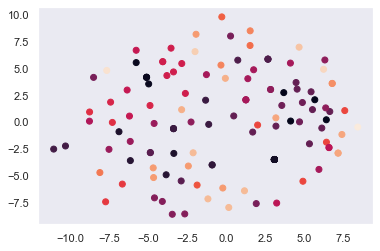

In [68]:
# plot the centroids
plt.scatter(
    X_transformed[:, 0], X_transformed[:, 1], c=clusters
)
plt.grid()
plt.show()

# Show clusters

In [43]:
cluster_number = 1
for index, value in enumerate(clusters): 
    if value == cluster_number:
        print(text_list[index])

CEO of
spokesperson for
CEO of
CEO of
CEO at


In [44]:
cluster_number = 20
for index, value in enumerate(clusters): 
    if value == cluster_number:
        print(text_list[index])

engineer at
president at
officer at
director for
director at
director for
head of


In [45]:
cluster_number = 32
for index, value in enumerate(clusters): 
    if value == cluster_number:
        print(text_list[index])

joining
bringing
bringing
challenging
